In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [4]:
data = pd.read_csv('3.12. Example.csv')
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


Data from a retail shop has 30 observations, two attributes: Satisfaction and Loyalty.
Satisfaction refers to customers rating.

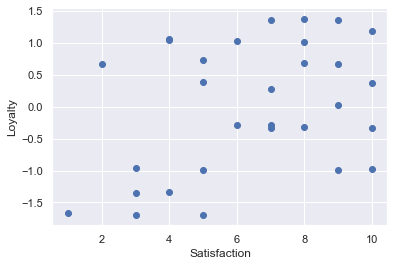

In [5]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

From the above plot we can observe two clusters, but

Let's categorize the plot into 4 quarters as 
1. low satifaction & low loyalty
2. low satisfaction & high loyalty
3. High satisfaction & low loyalty
4. High satisfaction & high loyalty

Now let's form clustering:


In [7]:
x = data.copy()

In [8]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
clusters_data = x.copy()
clusters_data['cluster_pred'] = kmeans.fit_predict(x)

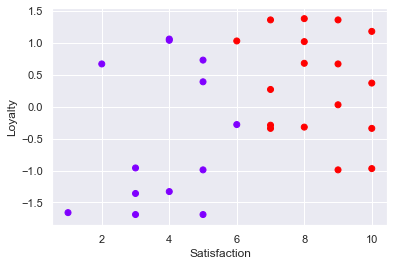

In [10]:
plt.scatter(clusters_data['Satisfaction'], clusters_data['Loyalty'], c=clusters_data['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

From the above plot it is clear that the clustering has happened as a cut-off line on 6 where everything on the left as one cluster and the other on the right side of the cut-off line, This happened because mostly the algorithm ONLY considered satisfaction as a feature. WHY? because we didn't standardize the variables, whenever we cluster based on a single feature, the result looks like this graph.

So How can we fix this problem, we can do this by standardizing the variables.

In [12]:
from sklearn import preprocessing
# sklearn.preprocessing.scale(x): scales (standardizes with mean 0, and standard deviation of 1 by default) each variables (column) seperately.
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

x_scaled contains the standardized 'Satisfaction' and the same values for 'Loyalty', since Loyalty has 0 mean and standard deviation as 1

Through the elbow method lets find the perfect cluster.

In [13]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.34807941029098,
 4.393997941560441,
 3.8593505244765893]

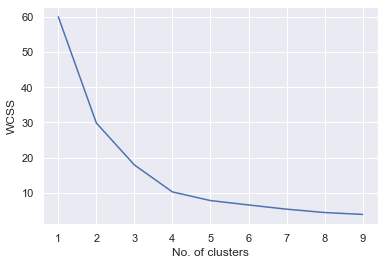

In [14]:
plt.plot(range(1,10), wcss)
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

Now let us try to generate the clusters for 3,4,5, 6 and check the difference between all the plot and finally decided the perfect cluster constant

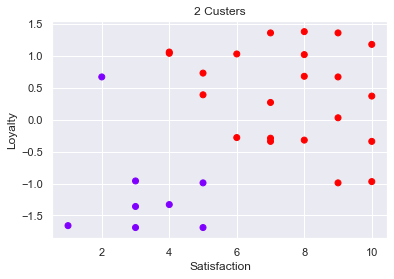

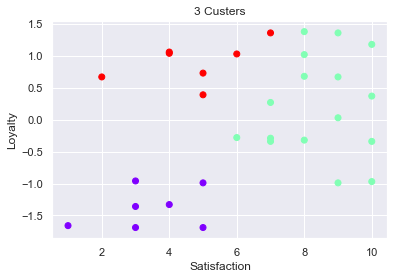

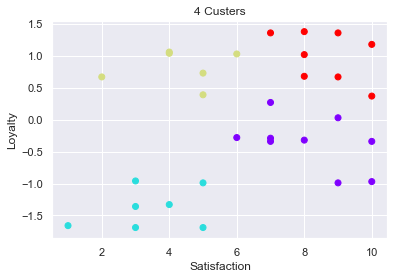

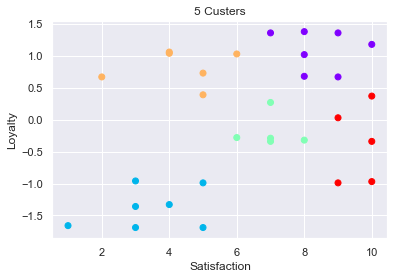

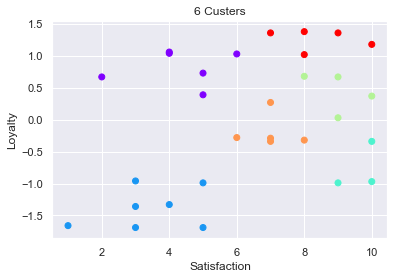

In [20]:
for i in range(2, 7):
    kmeans_new = KMeans(i)
    kmeans_new.fit(x_scaled)
    cluster_data_new = x.copy()
    cluster_data_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
    plt.scatter(cluster_data_new['Satisfaction'], cluster_data_new['Loyalty'], c=cluster_data_new['cluster_pred'], cmap='rainbow')
    plt.title(str(i)+ ' Custers')
    plt.xlabel('Satisfaction')
    plt.ylabel('Loyalty')
    plt.show()

From the above plots, we can deduct that the perfect clusters are 4 and 5